In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

essing Record 49 of Set 3 | damara
Processing Record 50 of Set 3 | laguna
Processing Record 1 of Set 4 | kongolo
Processing Record 2 of Set 4 | geraldton
Processing Record 3 of Set 4 | hami
Processing Record 4 of Set 4 | cajati
Processing Record 5 of Set 4 | fort nelson
Processing Record 6 of Set 4 | saint-philippe
Processing Record 7 of Set 4 | novocheremshansk
Processing Record 8 of Set 4 | biu
Processing Record 9 of Set 4 | ponta do sol
Processing Record 10 of Set 4 | jackson
Processing Record 11 of Set 4 | mugur-aksy
Processing Record 12 of Set 4 | kadykchan
City not found. Skipping...
Processing Record 13 of Set 4 | purranque
Processing Record 14 of Set 4 | tocopilla
Processing Record 15 of Set 4 | cockburn town
Processing Record 16 of Set 4 | hithadhoo
Processing Record 17 of Set 4 | nueve de julio
Processing Record 18 of Set 4 | chapais
Processing Record 19 of Set 4 | mtsensk
Processing Record 20 of Set 4 | ambon
Processing Record 21 of Set 4 | nikolskoye
Processing Record 22 of

In [7]:
len(city_data)

566

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamenka,51.3223,42.7678,34.00,95,100,3.00,RU,2021-01-27 16:07:24
1,Haines Junction,60.7522,-137.5108,-27.40,68,45,1.14,CA,2021-01-27 16:07:24
2,New Norfolk,-42.7826,147.0587,55.00,64,83,1.39,AU,2021-01-27 16:07:25
3,Lakes Entrance,-37.8811,147.9810,63.00,84,99,7.00,AU,2021-01-27 16:07:25
4,Kapaa,22.0752,-159.3190,73.99,88,75,13.80,US,2021-01-27 16:07:25
5,Tura,25.5198,90.2201,58.66,63,0,2.82,IN,2021-01-27 16:07:25
6,Albany,42.6001,-73.9662,30.99,64,92,14.00,US,2021-01-27 16:07:25
7,Alvarado,18.7667,-95.7667,79.00,68,5,8.99,MX,2021-01-27 16:05:01
8,Ribeira Grande,38.5167,-28.7000,62.20,80,67,31.70,PT,2021-01-27 16:07:26
9,Puerto Penasco,31.3167,-113.5333,54.72,58,0,8.43,MX,2021-01-27 16:07:26


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

new_order_city_data_df = city_data_df[new_column_order]
new_order_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kamenka,RU,2021-01-27 16:07:24,51.3223,42.7678,34.00,95,100,3.00
1,Haines Junction,CA,2021-01-27 16:07:24,60.7522,-137.5108,-27.40,68,45,1.14
2,New Norfolk,AU,2021-01-27 16:07:25,-42.7826,147.0587,55.00,64,83,1.39
3,Lakes Entrance,AU,2021-01-27 16:07:25,-37.8811,147.9810,63.00,84,99,7.00
4,Kapaa,US,2021-01-27 16:07:25,22.0752,-159.3190,73.99,88,75,13.80
5,Tura,IN,2021-01-27 16:07:25,25.5198,90.2201,58.66,63,0,2.82
6,Albany,US,2021-01-27 16:07:25,42.6001,-73.9662,30.99,64,92,14.00
7,Alvarado,MX,2021-01-27 16:05:01,18.7667,-95.7667,79.00,68,5,8.99
8,Ribeira Grande,PT,2021-01-27 16:07:26,38.5167,-28.7000,62.20,80,67,31.70
9,Puerto Penasco,MX,2021-01-27 16:07:26,31.3167,-113.5333,54.72,58,0,8.43


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
new_order_city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

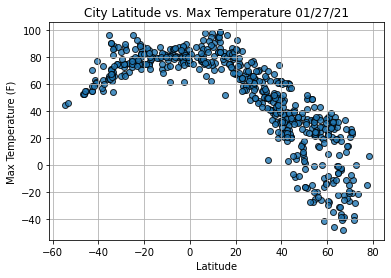

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

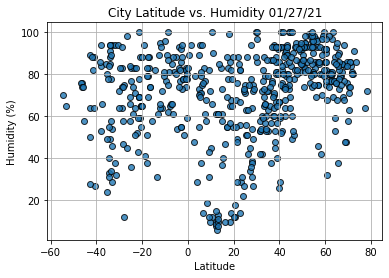

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

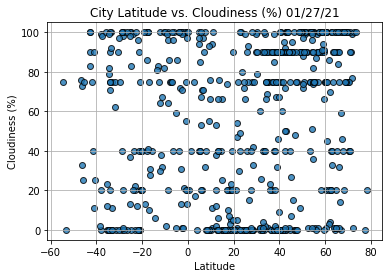

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

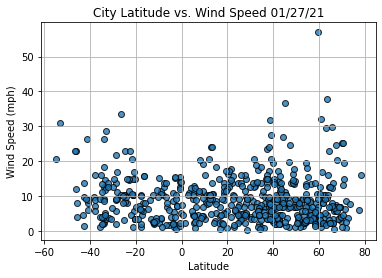

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()